# Lab 9 - Association Rule Mining



Association rule mining started off as market basket analysis, which looked at items customers bought frequently together. Through association rule mining, we can discover interesting associations that help business decision-making processes such as catalog design, cross-marketing, customer shopping behavior analysis and more. 

Basic Principle:

- **Frequent patterns** are itemsets that appear frequently in a dataset (e.g. transaction records).
- Items that are frequently associated (e.g. purchased) together can be represented as **association rules**
- **Support** and **Confidence** are measures of rule interestingness

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
try:
    df = pd.read_csv('../data/groceries_dataset.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Exploratoy Data Analysis & Data Pre-processing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [5]:
print("There are {} products:".format(df['itemDescription'].nunique()))
df['itemDescription'].unique()

There are 167 products:


array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

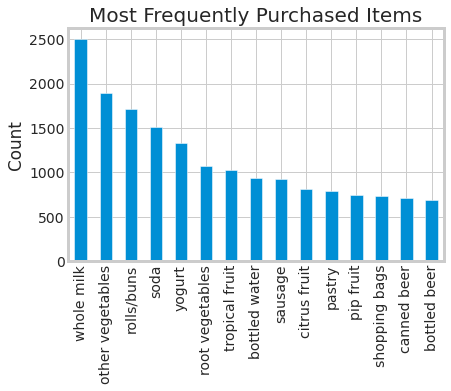

In [6]:
ax = df['itemDescription'].value_counts().nlargest(15).plot(kind='bar')
ax.set_title('Most Frequently Purchased Items', size=20)
ax.set_ylabel('Count');

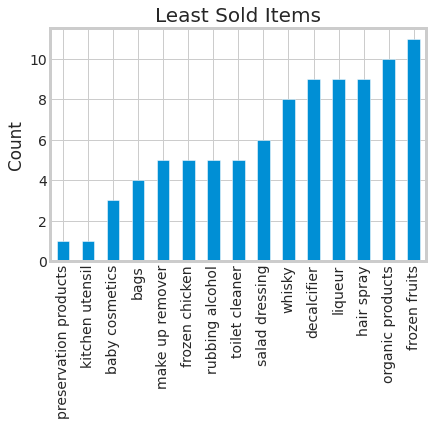

In [7]:
ax = df['itemDescription'].value_counts().nsmallest(15).plot(kind='bar')
ax.set_title('Least Sold Items', size=20)
ax.set_ylabel('Count');

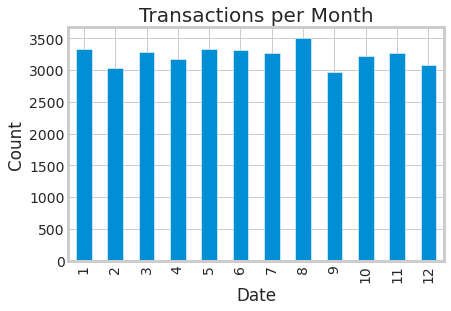

In [8]:
ax = df.groupby(df['Date'].dt.month).count()['itemDescription'].plot(kind='bar')
ax.set_title('Transactions per Month', size=20)
ax.set_ylabel('Count');

In [9]:
enc_df = df.drop_duplicates().pivot(index=['Member_number', 'Date'], columns='itemDescription', values='itemDescription')
enc_df

itemDescription          Instant food products UHT-milk abrasive cleaner  \
Member_number Date                                                         
1000          2014-06-24                   NaN      NaN              NaN   
              2015-03-15                   NaN      NaN              NaN   
              2015-05-27                   NaN      NaN              NaN   
              2015-07-24                   NaN      NaN              NaN   
              2015-11-25                   NaN      NaN              NaN   
...                                        ...      ...              ...   
4999          2015-05-16                   NaN      NaN              NaN   
              2015-12-26                   NaN      NaN              NaN   
5000          2014-09-03                   NaN      NaN              NaN   
              2014-11-16                   NaN      NaN              NaN   
              2015-10-02                   NaN      NaN              NaN   

itemDescription          artif. sweetener baby cosmetics bags baking powder  \
Member_number Date                                                            
1000          2014-06-24              NaN            NaN  NaN           NaN   
              2015-03-15              NaN            NaN  NaN           NaN   
              2015-05-27              NaN            NaN  NaN           NaN   
              2015-07-24              NaN            NaN  NaN           NaN   
              2015-11-25              NaN            NaN  NaN           NaN   
...                                   ...            ...  ...           ...   
4999          2015-05-16              NaN            NaN  NaN           NaN   
              2015-12-26              NaN            NaN  NaN           NaN   
5000          2014-09-03              NaN            NaN  NaN           NaN   
              2014-11-16              NaN            NaN  NaN           NaN   
              2015-10-02              NaN            NaN  NaN           NaN   

itemDescription          bathroom cleaner beef berries  ... turkey vinegar  \
Member_number Date                                      ...                  
1000          2014-06-24              NaN  NaN     NaN  ...    NaN     NaN   
              2015-03-15              NaN  NaN     NaN  ...    NaN     NaN   
              2015-05-27              NaN  NaN     NaN  ...    NaN     NaN   
              2015-07-24              NaN  NaN     NaN  ...    NaN     NaN   
              2015-11-25              NaN  NaN     NaN  ...    NaN     NaN   
...                                   ...  ...     ...  ...    ...     ...   
4999          2015-05-16              NaN  NaN     NaN  ...    NaN     NaN   
              2015-12-26              NaN  NaN     NaN  ...    NaN     NaN   
5000          2014-09-03              NaN  NaN     NaN  ...    NaN     NaN   
              2014-11-16              NaN  NaN     NaN  ...    NaN     NaN   
              2015-10-02              NaN  NaN     NaN  ...    NaN     NaN   

itemDescription          waffles  whipped/sour cream whisky white bread  \
Member_number Date                                                        
1000          2014-06-24     NaN                 NaN    NaN         NaN   
              2015-03-15     NaN                 NaN    NaN         NaN   
              2015-05-27     NaN                 NaN    NaN         NaN   
              2015-07-24     NaN                 NaN    NaN         NaN   
              2015-11-25     NaN                 NaN    NaN         NaN   
...                          ...                 ...    ...         ...   
4999          2015-05-16     NaN  whipped/sour cream    NaN         NaN   
              2015-12-26     NaN                 NaN    NaN         NaN   
5000          2014-09-03     NaN                 NaN    NaN         NaN   
              2014-11-16     NaN                 NaN    NaN         NaN   
              2015-10-02     NaN                 NaN    NaN         

In [10]:
enc_df = enc_df.notnull()
enc_df

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          2014-06-24                  False     False             False   
              2015-03-15                  False     False             False   
              2015-05-27                  False     False             False   
              2015-07-24                  False     False             False   
              2015-11-25                  False     False             False   
...                                         ...       ...               ...   
4999          2015-05-16                  False     False             False   
              2015-12-26                  False     False             False   
5000          2014-09-03                  False     False             False   
              2014-11-16                  False     False             False   
              2015-10-02                  False     False             False   

itemDescription           artif. sweetener  baby cosmetics   bags  \
Member_number Date                                                  
1000          2014-06-24             False           False  False   
              2015-03-15             False           False  False   
              2015-05-27             False           False  False   
              2015-07-24             False           False  False   
              2015-11-25             False           False  False   
...                                    ...             ...    ...   
4999          2015-05-16             False           False  False   
              2015-12-26             False           False  False   
5000          2014-09-03             False           False  False   
              2014-11-16             False           False  False   
              2015-10-02             False           False  False   

itemDescription           baking powder  bathroom cleaner   beef  berries  \
Member_number Date                                                          
1000          2014-06-24          False             False  False    False   
              2015-03-15          False             False  False    False   
              2015-05-27          False             False  False    False   
              2015-07-24          False             False  False    False   
              2015-11-25          False             False  False    False   
...                                 ...               ...    ...      ...   
4999          2015-05-16          False             False  False    False   
              2015-12-26          False             False  False    False   
5000          2014-09-03          False             False  False    False   
              2014-11-16          False             False  False    False   
              2015-10-02          False             False  False    False   

itemDescription           ...  turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date        ...                                                 
1000          2014-06-24  ...   False    False    False               False   
              2015-03-15  ...   False    False    False               False   
              2015-05-27  ...   False    False    False               False   
              2015-07-24  ...   False    False    False               False   
              2015-11-25  ...   False    False    False               False   
...                       ...     ...      ...      ...                 ...   
4999          2015-05-16  ...   False    False    False                True   
              2015-12-26  ...   False    False    False               False   
5000          2014-09-03  ...   False    False    False               False   
              2014-11-16  ...   False    False    False               False   
              2015-10-02  ...   False    False    False               False   

itemDescription           whisky  white brea

Text(0.5, 0, 'Number of items in a single transaction.')

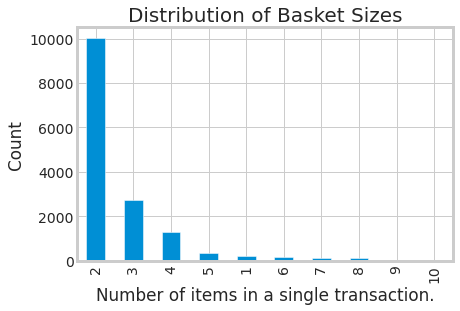

In [11]:
basket_sizes = enc_df.sum(axis=1)
ax = basket_sizes.value_counts().plot.bar()
ax.set_title('Distribution of Basket Sizes', size=20)
ax.set_ylabel('Count')
ax.set_xlabel('Number of items in a single transaction.')

Text(0, 0.5, 'Number of times bought alone')

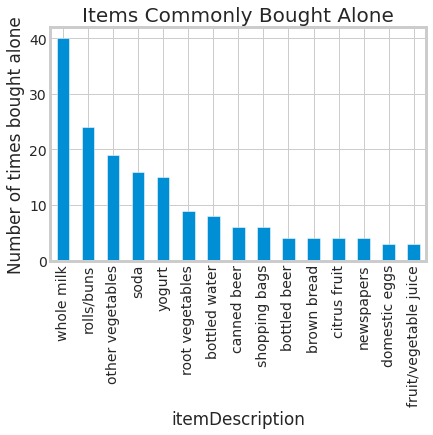

In [12]:
single_items = enc_df[basket_sizes == 1].sum()
ax = single_items.nlargest(15).plot.bar()
ax.set_title('Items Commonly Bought Alone', size=20)
ax.set_ylabel('Number of times bought alone')

## Association Rule Mining

$supp(A \Rightarrow B)=\dfrac{|A \cup B|}{n}$

In [13]:
# uncomment the line below if facing import errors
# !pip install mlxtend

from mlxtend.frequent_patterns import fpgrowth, association_rules

freq_items = fpgrowth(enc_df, min_support=0.005, use_colnames=True)
freq_items

,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
121,0.007151,"(bottled beer, whole milk)"
122,0.005280,"(domestic eggs, whole milk)"
123,0.005614,"(newspapers, whole milk)"
124,0.007151,"(citrus fruit, whole milk)"


$conf(A \Rightarrow B)=\dfrac{supp(A \cup B)}{supp(A)}$

In [14]:
association_rules(freq_items, metric='confidence', min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,-0.001686,0.962729
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
2,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
4,(canned beer),(whole milk),0.046916,0.157923,0.006015,0.128205,0.811821,-0.001394,0.965912
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
6,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958
7,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
9,(tropical fruit),(whole milk),0.067767,0.157923,0.008220,0.121302,0.768108,-0.002482,0.958323
